<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/Maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated example data
# Step 1: Start with your time-series data
t = np.arange(0, 100)  # 100 days
pm25 = 50 + 10 * np.sin(2 * np.pi * t / 7) + np.random.normal(0, 5, 100)  # Weekly pattern + noise


In [ ]:
# Step 2: Apply Fast Fourier Transform (FFT)
fft_result = np.fft.fft(pm25)
frequencies = np.fft.fftfreq(len(pm25))


In [ ]:
# Step 3: Filter out high-frequency noise
filtered_fft = fft_result.copy()
filtered_fft[np.abs(frequencies) > 0.1] = 0  # Remove high frequencies


In [ ]:
# Step 4: Inverse FFT to get smoothed data
smoothed_pm25 = np.fft.ifft(filtered_fft).real


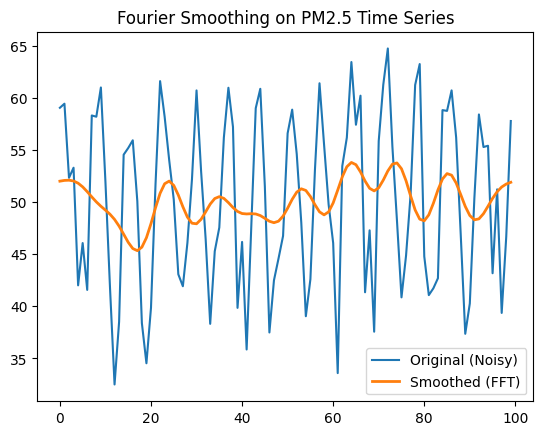

In [ ]:
# Step 5: Plot Original vs Smoothed
plt.plot(t, pm25, label='Original (Noisy)')
plt.plot(t, smoothed_pm25, label='Smoothed (FFT)', linewidth=2)
plt.legend()
plt.title("Fourier Smoothing on PM2.5 Time Series")
plt.show()


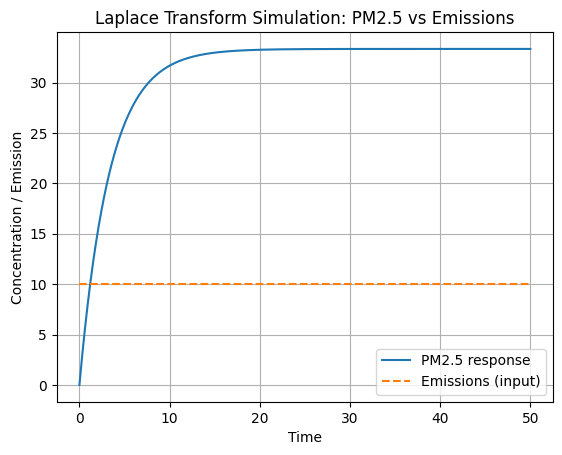

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, lsim

# System parameters
a = 0.3  # decay rate of PM2.5 (natural dispersion)
b = 1.0  # sensitivity to emissions

# Define transfer function: PM(s)/E(s) = b / (s + a)
numerator = [b]
denominator = [1, a]  # corresponds to s + a
system = lti(numerator, denominator)

# Time vector
t = np.linspace(0, 50, 500)

# Emission input function: constant emissions (e.g., from traffic)
emissions = np.ones_like(t) * 10  # E(t) = 10

# Simulate response
t_out, pm25_response, _ = lsim(system, emissions, t)

# Plot the result
plt.plot(t_out, pm25_response, label="PM2.5 response")
plt.plot(t, emissions, '--', label="Emissions (input)")
plt.xlabel("Time")
plt.ylabel("Concentration / Emission")
plt.title("Laplace Transform Simulation: PM2.5 vs Emissions")
plt.legend()
plt.grid(True)
plt.show()
